In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Reading The Datasets
1. Session Dataset

In [2]:
sessionData = pd.read_csv('Desktop/Xlence-AI/data/session_related.csv')
sessionData.head()

,OrderId,IP_start_session,IP_end_session,Session_Pincode,Delivery_Pincode,IsValidGeo
0,86611,57.79.00.250,211.75.38.8,431401,431401,NO
1,61343,2.8.4.8,8.9.103.186,403712,403712,NO
2,55944,5.151.253.234,5.151.253.234,793101,793101,YES
3,842,235.231.255.2,235.231.255.2,177001,176992,NO
4,50594,255.251.119.201,255.251.119.201,799201,799201,NO


2. Outliers Dataset

In [3]:
genericData = pd.read_csv('Desktop/Xlence-AI/data/generic_outliers_data.csv')
genericData.head()

,CustId,Age,EmailId,MobileNo,MacAddress,AvgPurchase,City,OccupationalLevel,IncomeLevel,Pincode
0,100,18,WCkD3InDq@gmail.com,4916661116,A7-17-AC-BB-87-09,3580,Baidyanadh Deoghar,Technical,very low,814112
1,101,18,iPjORQGqy@hotmail.com,8156912083,3D-E0-06-66-01-00,7585,Chakpirang,Non-technical,very low,795102
2,102,18,ShyCmCDbmB@aol.com,6663941231,3A-DE-69-A8-98-04,4456,Kala pahad,Non-technical,very low,795122
3,103,18,VdjRDafd@yahoo.com,3761853308,15-74-5C-91-78-E6,91474,Ukhrul,Technical,very high,795142
4,104,18,rLaKt3AxMK@gmail.com,7391938452,BA-6B-47-85-66-E7,62522,Kulittalai,Non-technical,high,639104


3. Delivery Dataset

In [4]:
deliveryData = pd.read_csv('Desktop/Xlence-AI/data/delivery_related.csv')
deliveryData.head()

,CustId,OrderId,ProductId,IsValidAddress,IsAddchangeRecently,IsAddchangeonDel,IsDeliveryRejected,OriginalPrice,PaidPrice,OrderDate,AddressChangeDate,DeliveryDate,ReplacementDate,IsProductConsumable,IsOneTimeUseProduct,IsOfferCodeApplied,Fraud
0,47019,41601,41601,yes,no,yes,yes,2711,2711,25/01/2019,20/11/2018,28/01/2019,01/02/2019,yes,no,no,normal
1,20242,30352,30352,no,yes,no,no,2713,2710,06/02/2019,03/02/2019,10/02/2019,17/02/2019,yes,yes,no,normal
2,79619,12328,12328,yes,no,yes,yes,4146,4142,12/01/2019,30/07/2018,22/01/2019,01/02/2019,yes,no,yes,suspicious
3,80669,19203,19203,yes,no,yes,no,2709,2707,27/03/2019,14/06/2018,03/04/2019,06/04/2019,yes,no,yes,normal
4,64577,19842,19842,no,no,no,yes,8815,8811,17/01/2019,26/11/2018,21/01/2019,28/01/2019,yes,no,yes,normal


# Feature Engineering
#### Merging of Datasets and Extraction of required features from the given datasets

In [5]:
firstmerge = pd.merge(deliveryData,sessionData,on='OrderId')

In [6]:
MergedDataset = pd.merge(firstmerge,genericData,on='CustId')
MergedDataset.head()

,CustId,OrderId,ProductId,IsValidAddress,IsAddchangeRecently,IsAddchangeonDel,IsDeliveryRejected,OriginalPrice,PaidPrice,OrderDate,...,IsValidGeo,Age,EmailId,MobileNo,MacAddress,AvgPurchase,City,OccupationalLevel,IncomeLevel,Pincode
0,47019,41601,41601,yes,no,yes,yes,2711,2711,25/01/2019,...,YES,23,aQGHuxe@yahoo.com,1867946110,1D-BA-45-3F-E5-43,99522,Latur,Non-technical,very high,413512
1,20242,30352,30352,no,yes,no,no,2713,2710,06/02/2019,...,YES,18,sej94kG@hotmail.com,9272875375,65-D1-F3-62-F7-44,3491,Mumbai G.P.O.,Non-technical,very low,400001
2,79619,12328,12328,yes,no,yes,yes,4146,4142,12/01/2019,...,NO,18,HTVm_XUBz@gmail.com,3251871005,DF-6D-BF-6C-23-59,5262,Chhatarpur City,Technical,very low,471001
3,79619,80750,80750,no,yes,no,no,2662,2662,19/01/2019,...,NO,18,HTVm_XUBz@gmail.com,3251871005,DF-6D-BF-6C-23-59,5262,Chhatarpur City,Technical,very low,471001
4,80669,19203,19203,yes,no,yes,no,2709,2707,27/03/2019,...,YES,18,dPiRkMo3i@gmail.com,3152175434,49-55-60-A5-F5-2B,4957,Sunamura,Non-technical,very low,799131


In [7]:
IndependentAttributes = pd.DataFrame()

### Discuessed Features as of 26/04/2019

#### CustId, OrderId, ProductId, IsValidAddress, IsDeliveryRejected, ReplacementDate, IsOneTimeUseProduct, IsValidGeo, EmailId, MobileNo, MacAddress, AvgPurchase, City, IncomeLevel, Session_Pincode & Fraud

In [8]:
CustId = MergedDataset['CustId']
OrderId = MergedDataset['OrderId']
EmailId = MergedDataset['EmailId']
MobileNo = MergedDataset['MobileNo']
MacAddress = MergedDataset['MacAddress']
AvgPurchase = MergedDataset['AvgPurchase']
City = MergedDataset['City']
IsValidGeo = MergedDataset['IsValidGeo']
IsValidAddress = MergedDataset['IsValidAddress']
IsDeliveryRejected = MergedDataset['IsDeliveryRejected']
ReplacementDate = MergedDataset['ReplacementDate']
IsOneTimeUseProduct = MergedDataset['IsOneTimeUseProduct']
Session_Pincode = MergedDataset['Session_Pincode']
DeliveryDate = MergedDataset['DeliveryDate']
OrderDate = MergedDataset['OrderDate']
Fraud = MergedDataset['Fraud']

In [9]:
IndependentAttributes['CustId'] = CustId
IndependentAttributes['OrderId'] = OrderId
IndependentAttributes['EmailId'] = EmailId
IndependentAttributes['MobileNo'] = MobileNo
IndependentAttributes['MacAddress'] = MacAddress
IndependentAttributes['Session_Pincode'] = Session_Pincode
IndependentAttributes['AvgPurchase'] = AvgPurchase
IndependentAttributes['City'] = City
IndependentAttributes['OrderDate'] = OrderDate
IndependentAttributes['DeliveryDate'] = DeliveryDate

In [10]:
df1 = pd.DataFrame(IndependentAttributes['OrderDate'])
df1['DeliveryDate'] = IndependentAttributes['DeliveryDate']
df1['OrderDate'] = pd.to_datetime(df1['OrderDate'], format='%d/%m/%Y')
df1['DeliveryDate'] = pd.to_datetime(df1['DeliveryDate'], format='%d/%m/%Y')
DaysDifference = (df1['DeliveryDate'] - df1['OrderDate'])
df1.drop(['DeliveryDate', 'OrderDate'], axis='columns', inplace=True)

IndependentAttributes['DaysDifference'] = DaysDifference

In [11]:
IndependentAttributes['ReplacementDate'] = ReplacementDate
IndependentAttributes['IsDeliveryRejected'] = IsDeliveryRejected
IndependentAttributes['IsOneTimeUseProduct'] = IsOneTimeUseProduct
IndependentAttributes['IsValidAddress'] = IsValidAddress
IndependentAttributes['IsValidGeo'] = IsValidGeo
IndependentAttributes['Fraud'] = Fraud

In [12]:
IndependentAttributes.head()

,CustId,OrderId,EmailId,MobileNo,MacAddress,Session_Pincode,AvgPurchase,City,OrderDate,DeliveryDate,DaysDifference,ReplacementDate,IsDeliveryRejected,IsOneTimeUseProduct,IsValidAddress,IsValidGeo,Fraud
0,47019,41601,aQGHuxe@yahoo.com,1867946110,1D-BA-45-3F-E5-43,276001,99522,Latur,25/01/2019,28/01/2019,3 days,01/02/2019,yes,no,yes,YES,normal
1,20242,30352,sej94kG@hotmail.com,9272875375,65-D1-F3-62-F7-44,505468,3491,Mumbai G.P.O.,06/02/2019,10/02/2019,4 days,17/02/2019,no,yes,no,YES,normal
2,79619,12328,HTVm_XUBz@gmail.com,3251871005,DF-6D-BF-6C-23-59,586209,5262,Chhatarpur City,12/01/2019,22/01/2019,10 days,01/02/2019,yes,no,yes,NO,suspicious
3,79619,80750,HTVm_XUBz@gmail.com,3251871005,DF-6D-BF-6C-23-59,791102,5262,Chhatarpur City,19/01/2019,26/01/2019,7 days,31/01/2019,no,yes,no,NO,normal
4,80669,19203,dPiRkMo3i@gmail.com,3152175434,49-55-60-A5-F5-2B,250001,4957,Sunamura,27/03/2019,03/04/2019,7 days,06/04/2019,no,no,yes,YES,normal


# Data Cleaning
#### 1. Replacing yes/no with 1/0

In [13]:
IndependentAttributes.IsDeliveryRejected.replace(('yes', 'no'), (1, 0), inplace=True)
IndependentAttributes.IsOneTimeUseProduct.replace(('yes', 'no'), (1, 0), inplace=True)
IndependentAttributes.IsValidGeo.replace(('YES', 'NO'), (1, 0), inplace=True)
IndependentAttributes.IsValidAddress.replace(('yes', 'no'), (1, 0), inplace=True)
IndependentAttributes.Fraud.replace(('normal', 'suspicious', 'fraud'), (0, 1, 1), inplace=True)

#### 2. Refinements in MacAddress, Dates, etc

In [14]:
IndependentAttributes.MacAddress.replace(regex=r'-', value='', inplace=True)

In [15]:
IndependentAttributes.DeliveryDate.replace(regex=r'/', value='-', inplace=True)
IndependentAttributes.OrderDate.replace(regex=r'/', value='-', inplace=True)
IndependentAttributes.ReplacementDate.replace(regex=r'/', value='-', inplace=True)

In [16]:
IndependentAttributes['DaysDifference'] = IndependentAttributes.DaysDifference.dt.days

In [17]:
IndependentAttributes.head()

,CustId,OrderId,EmailId,MobileNo,MacAddress,Session_Pincode,AvgPurchase,City,OrderDate,DeliveryDate,DaysDifference,ReplacementDate,IsDeliveryRejected,IsOneTimeUseProduct,IsValidAddress,IsValidGeo,Fraud
0,47019,41601,aQGHuxe@yahoo.com,1867946110,1DBA453FE543,276001,99522,Latur,25-01-2019,28-01-2019,3,01-02-2019,1,0,1,1,0
1,20242,30352,sej94kG@hotmail.com,9272875375,65D1F362F744,505468,3491,Mumbai G.P.O.,06-02-2019,10-02-2019,4,17-02-2019,0,1,0,1,0
2,79619,12328,HTVm_XUBz@gmail.com,3251871005,DF6DBF6C2359,586209,5262,Chhatarpur City,12-01-2019,22-01-2019,10,01-02-2019,1,0,1,0,1
3,79619,80750,HTVm_XUBz@gmail.com,3251871005,DF6DBF6C2359,791102,5262,Chhatarpur City,19-01-2019,26-01-2019,7,31-01-2019,0,1,0,0,0
4,80669,19203,dPiRkMo3i@gmail.com,3152175434,495560A5F52B,250001,4957,Sunamura,27-03-2019,03-04-2019,7,06-04-2019,0,0,1,1,0


# Feature Engineering
#### 1. Memory Usage Optimization

In [18]:
IndependentAttributes.dtypes

CustId                  int64
OrderId                 int64
EmailId                object
MobileNo                int64
MacAddress             object
Session_Pincode         int64
AvgPurchase             int64
City                   object
OrderDate              object
DeliveryDate           object
DaysDifference          int64
ReplacementDate        object
IsDeliveryRejected      int64
IsOneTimeUseProduct     int64
IsValidAddress          int64
IsValidGeo              int64
Fraud                  object
dtype: object

In [19]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [20]:
df = pd.DataFrame() 
df = reduce_mem_usage(IndependentAttributes)  

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 10.89 MB
Decreased by 20.7%


In [21]:
df.dtypes

CustId                    int32
OrderId                   int32
EmailId                category
MobileNo                  int64
MacAddress             category
Session_Pincode           int32
AvgPurchase               int32
City                   category
OrderDate              category
DeliveryDate           category
DaysDifference             int8
ReplacementDate        category
IsDeliveryRejected         int8
IsOneTimeUseProduct        int8
IsValidAddress             int8
IsValidGeo                 int8
Fraud                  category
dtype: object

#### 2. Exploratory Data Analysis
#### describe() method shows values like count, mean, standard deviation, etc. of numeric data types.

In [22]:
df.describe()

,CustId,OrderId,MobileNo,Session_Pincode,AvgPurchase,DaysDifference,IsDeliveryRejected,IsOneTimeUseProduct,IsValidAddress,IsValidGeo
count,100000.00000,100000.000000,1.000000e+05,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000
mean,50076.51905,50099.500000,5.489625e+09,563983.98808,30194.418070,6.506040,0.50154,0.499670,0.499900,0.50162
std,28810.89187,28867.657797,2.594212e+09,205918.85053,30912.551998,2.288107,0.50000,0.500002,0.500002,0.50000
min,100.00000,100.000000,1.000380e+09,121001.00000,1000.000000,3.000000,0.00000,0.000000,0.000000,0.00000
25%,25177.00000,25099.750000,3.249997e+09,403705.00000,5524.000000,5.000000,0.00000,0.000000,0.000000,0.00000
50%,50051.50000,50099.500000,5.478894e+09,585201.00000,9968.000000,7.000000,1.00000,0.000000,0.000000,1.00000
75%,75043.00000,75099.250000,7.728095e+09,786125.00000,55079.250000,9.000000,1.00000,1.000000,1.000000,1.00000
max,100097.00000,100099.000000,9.999763e+09,854301.00000,99999.000000,10.000000,1.00000,1.000000,1.000000,1.00000


#### Get the total missing values present in columns of both train and test dataset

In [23]:
df.isnull().sum()

CustId                 0
OrderId                0
EmailId                0
MobileNo               0
MacAddress             0
Session_Pincode        0
AvgPurchase            0
City                   0
OrderDate              0
DeliveryDate           0
DaysDifference         0
ReplacementDate        0
IsDeliveryRejected     0
IsOneTimeUseProduct    0
IsValidAddress         0
IsValidGeo             0
Fraud                  0
dtype: int64

In [24]:
Fraud_txn = df[df['Fraud']== 1]
normal_txn = df[df['Fraud']== 0]

print("---------------------------")
print("From the training dataset:")
print("---------------------------")
print("  Total Customers : %i"\
      %(len(df)))
print("")
print("  Total Normal transactions  : %i"\
      %(len(normal_txn)))

print("  Normal transactions Rate   : %i %% "\
     % (1.*len(normal_txn)/len(df)*100.0))
print("-------------------------")

print("  Fraudulent transactions         : %i"\
      %(len(Fraud_txn)))

print("  Fraudulent transactions Rate    : %i %% "\
     % (1.*len(Fraud_txn)/len(df)*100.0))
print("-------------------------")

---------------------------
From the training dataset:
---------------------------
  Total Customers : 100000

  Total Normal transactions  : 70000
  Normal transactions Rate   : 70 % 
-------------------------
  Fraudulent transactions         : 25000
  Fraudulent transactions Rate    : 25 % 
-------------------------


# **Observations:**

From the dataset we get to know the below details:
* There is no missing data.
* Out of 100000 customers, 70% of the transactions are normal.
* 25% of them Fraud transactions.

For the next step we will try to **visualize the data.**

Visualizing the data helps us understanding the data better and this will help us in getting the dataset well prepared for the Model training.

#### Data Visualization

Below is the function **"bar_chart"** which will take in a feature as a parameter and provide us the bar chart.

The Bar chart will show how the **transaction type** varies with different features and its subtypes.

In [25]:
def bar_chart(feature):
    normal = df[df['Fraud']== 0][feature].value_counts()     
    Fraud = df[df['Fraud']== 1][feature].value_counts()
    bar_df = pd.DataFrame([normal,Fraud])
    bar_df.index = ['Normal', 'Fraudulent']
    bar_df.plot(kind='bar',stacked=True, figsize=(7,5))

#### Relationship between Features and Target Variable
Now in the below section we are going to see how each features impacts the transaction type of a customer.

In [26]:
def feature_relationship(feature):
    print(df[feature].value_counts())
    print('--------------------------------------')
    print(df.groupby(feature).Fraud.value_counts())
    bar_chart(feature)

0    50010
1    49990
Name: IsValidAddress, dtype: int64
--------------------------------------
IsValidAddress  Fraud     
0               0             34802
                1             12660
                fraudulent     2548
1               0             35198
                1             12340
                fraudulent     2452
Name: Fraud, dtype: int64


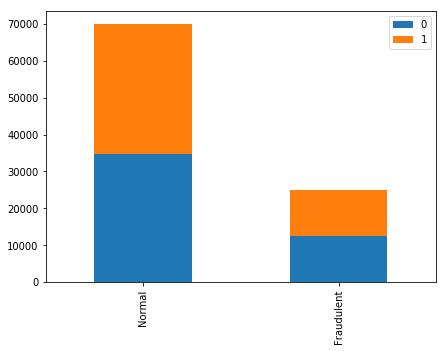

In [27]:
feature_relationship('IsValidAddress')

1    50154
0    49846
Name: IsDeliveryRejected, dtype: int64
--------------------------------------
IsDeliveryRejected  Fraud     
0                   0             34838
                    1             12488
                    fraudulent     2520
1                   0             35162
                    1             12512
                    fraudulent     2480
Name: Fraud, dtype: int64


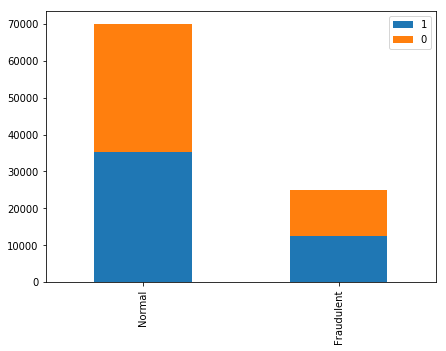

In [28]:
feature_relationship('IsDeliveryRejected') 

### Correlating Features

In [29]:
plt.figure(figsize=(15,6))
plt.show()

<Figure size 1080x432 with 0 Axes>

### Histogram for each parameter

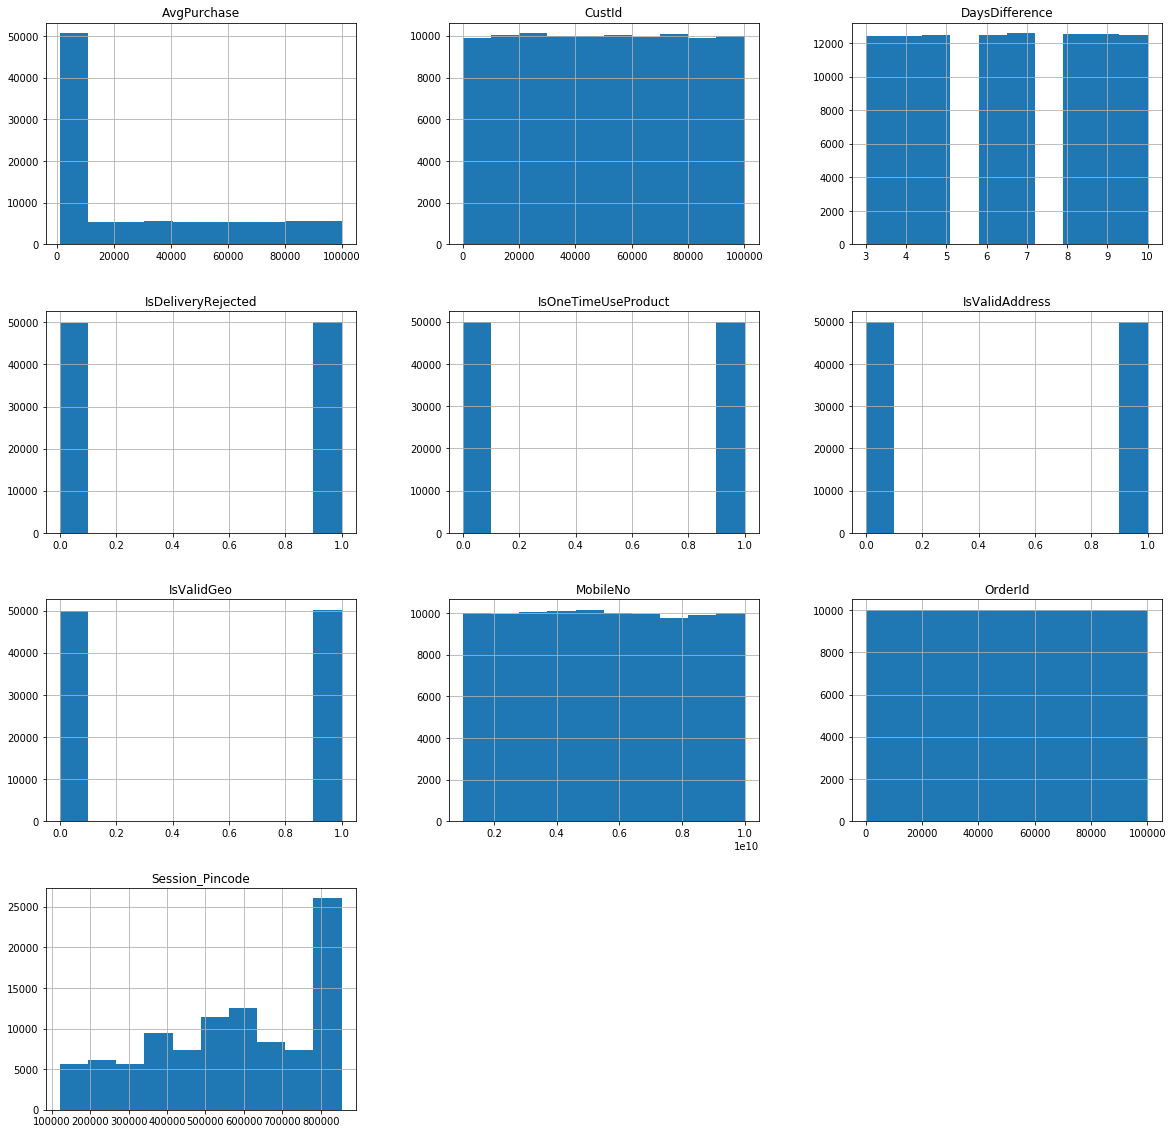

In [30]:
df.hist(figsize=(20,20))
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
categorical = ['IsValidAddress','IsDeliveryRejected','IsOneTimeUseProduct','IsValidGeo','City']

label_encoder = LabelEncoder()
for col in categorical:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

df=df.iloc[:df.shape[0]]

In [32]:
df['domain'] = df['EmailId'].str.split('@').str[1]
df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CustId,OrderId,EmailId,MobileNo,MacAddress,Session_Pincode,AvgPurchase,City,OrderDate,DeliveryDate,DaysDifference,ReplacementDate,IsDeliveryRejected,IsOneTimeUseProduct,IsValidAddress,IsValidGeo,Fraud,domain
0,47019,41601,aQGHuxe@yahoo.com,1867946110,1DBA453FE543,276001,99522,529,25-01-2019,28-01-2019,3,01-02-2019,1,0,1,1,0,yahoo.com
1,20242,30352,sej94kG@hotmail.com,9272875375,65D1F362F744,505468,3491,637,06-02-2019,10-02-2019,4,17-02-2019,0,1,0,1,0,hotmail.com
2,79619,12328,HTVm_XUBz@gmail.com,3251871005,DF6DBF6C2359,586209,5262,222,12-01-2019,22-01-2019,10,01-02-2019,1,0,1,0,1,gmail.com
3,79619,80750,HTVm_XUBz@gmail.com,3251871005,DF6DBF6C2359,791102,5262,222,19-01-2019,26-01-2019,7,31-01-2019,0,1,0,0,0,gmail.com
4,80669,19203,dPiRkMo3i@gmail.com,3152175434,495560A5F52B,250001,4957,926,27-03-2019,03-04-2019,7,06-04-2019,0,0,1,1,0,gmail.com


In [33]:
df.domain.unique()

array(['yahoo.com', 'hotmail.com', 'gmail.com', 'aol.com', 'mail.com'],
      dtype=object)

hotmail.com    20174
mail.com       20117
yahoo.com      20054
gmail.com      19860
aol.com        19795
Name: domain, dtype: int64
--------------------------------------
domain       Fraud     
aol.com      0             13852
             1              4903
             fraudulent     1040
gmail.com    0             13850
             1              5044
             fraudulent      966
hotmail.com  0             14097
             1              5075
             fraudulent     1002
mail.com     0             14121
             1              5027
             fraudulent      969
yahoo.com    0             14080
             1              4951
             fraudulent     1023
Name: Fraud, dtype: int64


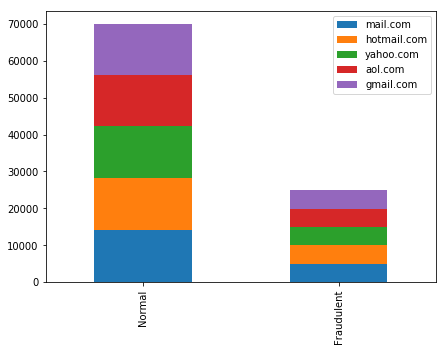

In [34]:
feature_relationship('domain')

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
features = pd.DataFrame(df)
labels = pd.DataFrame(features['Fraud'])
features = features.drop(['Fraud','EmailId','MacAddress'], axis=1)
features = features.apply(LabelEncoder().fit_transform)
features.head()

,CustId,OrderId,MobileNo,Session_Pincode,AvgPurchase,City,OrderDate,DeliveryDate,DaysDifference,ReplacementDate,IsDeliveryRejected,IsOneTimeUseProduct,IsValidAddress,IsValidGeo,domain
0,29653,41501,6101,134,35167,529,74,90,0,0,1,0,1,1,4
1,12665,30252,58249,383,2422,637,18,34,1,59,0,1,0,1,2
2,50439,12228,15784,522,4133,222,35,72,7,0,1,0,1,0,1
3,50439,80650,15784,787,4133,222,56,84,4,104,0,1,0,0,1
4,51092,19103,15101,112,3836,926,82,8,4,17,0,0,1,1,1


In [47]:
labels.head()

,Fraud
0,0
1,0
2,1
3,0
4,0


In [48]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(labels)
labels_enc = encoder.transform(labels)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: '<' not supported between instances of 'str' and 'int'

In [46]:
features.head()

,CustId,OrderId,MobileNo,Session_Pincode,AvgPurchase,City,OrderDate,DeliveryDate,DaysDifference,ReplacementDate,IsDeliveryRejected,IsOneTimeUseProduct,IsValidAddress,IsValidGeo,domain
0,29653,41501,6101,134,35167,529,74,90,0,0,1,0,1,1,4
1,12665,30252,58249,383,2422,637,18,34,1,59,0,1,0,1,2
2,50439,12228,15784,522,4133,222,35,72,7,0,1,0,1,0,1
3,50439,80650,15784,787,4133,222,56,84,4,104,0,1,0,0,1
4,51092,19103,15101,112,3836,926,82,8,4,17,0,0,1,1,1
